<a href="https://colab.research.google.com/github/ceofast/Deep_Learning/blob/main/Introduction_deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## AI90201 Neural Networks

In [ ]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

X, y = fetch_openml('mnist_784', version = 1, return_X_y = True, as_frame = False)

X = X / 255.0

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.7)

In [ ]:
import pandas as pd

data = pd.DataFrame(X)

data.insert(784, 'label', y)

data.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9


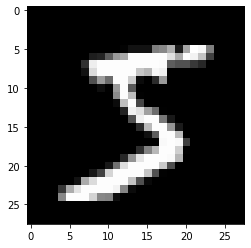

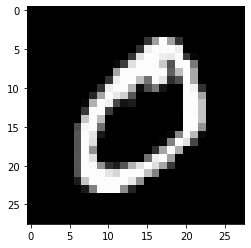

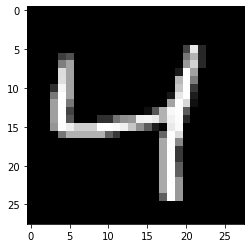

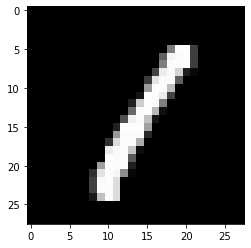

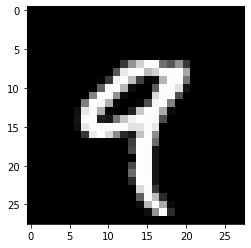

In [ ]:
import matplotlib.pyplot as plt

for i in range(5):
  plt.imshow(X[i].reshape((28, 28)), cmap = 'gray')
  plt.show()

In [ ]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes = 1, activation = 'logistic')

mlp1 = MLPClassifier(hidden_layer_sizes = 100, activation = 'logistic')

mlp2 = MLPClassifier(hidden_layer_sizes = 1000, activation = 'logistic')

In [ ]:
mlp.fit(X_train, y_train)

mlp1.fit(X_train, y_train)

mlp2.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


MLPClassifier(activation='logistic', hidden_layer_sizes=1000)

In [ ]:
predictions_NN = mlp.predict(X_test)
predictions_NN

array(['6', '4', '1', ..., '3', '1', '4'], dtype='<U1')

In [ ]:
predictions_NN1 = mlp1.predict(X_test)
predictions_NN1

array(['0', '4', '1', ..., '8', '3', '2'], dtype='<U1')

In [ ]:
predictions_NN2 = mlp2.predict(X_test)
predictions_NN2

array(['0', '4', '1', ..., '8', '3', '9'], dtype='<U1')

Actual Value: 4
Predicted Value For 1 Hidden Layer: 4
Predicted Value For 100 Hidden Layer: 4
Predicted Value For 1000 Hidden Layer: 4


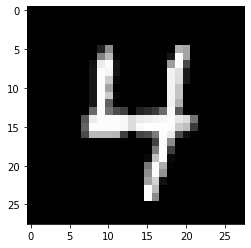

In [ ]:
print(f'Actual Value: {y_test[1]}')
print(f'Predicted Value For 1 Hidden Layer: {predictions_NN[1]}')
print(f'Predicted Value For 100 Hidden Layer: {predictions_NN1[1]}')
print(f'Predicted Value For 1000 Hidden Layer: {predictions_NN2[1]}')

plt.imshow(X_test[1].reshape((28,28)), cmap='gray')
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, predictions_NN)

array([[ 106, 1060,    0,  164,   16,    0, 3548,   17,    0,    0],
       [  59, 4731,    0,  496,   45,    0,  177,   36,    0,    0],
       [ 112, 1900,    0,  633,   51,    0, 2167,   33,    0,    0],
       [  10,  740,    0, 2994,  636,    0,  175,  431,    0,    0],
       [   0,   97,    0,  686, 2092,    0,   19, 1874,    0,    0],
       [  16,  768,    0, 2491,  551,    0,  119,  439,    0,    0],
       [  46,  505,    0,   88,   10,    0, 4130,    1,    0,    0],
       [   0,   51,    0,  114,  131,    0,    4, 4772,    0,    0],
       [   5,  869,    0, 2872,  545,    0,   49,  417,    0,    0],
       [   0,   33,    0,  160,  240,    0,    9, 4460,    0,    0]])

In [ ]:
confusion_matrix(y_test, predictions_NN1)

array([[4794,    2,   13,    7,   10,   15,   36,    7,   21,    6],
       [   2, 5475,   22,   11,    4,    3,    3,    8,    8,    8],
       [  15,    8, 4721,   22,   37,    2,   17,   34,   34,    6],
       [   6,   11,   69, 4711,    3,   86,    5,   27,   47,   21],
       [   3,   11,   15,    4, 4610,    4,   27,   14,    7,   73],
       [  13,    7,   16,   62,   16, 4169,   42,    8,   27,   24],
       [  17,   11,   11,    3,   21,   27, 4673,    4,   13,    0],
       [   6,   17,   42,   13,   36,    3,    0, 4911,    5,   39],
       [  25,   38,   33,   37,   16,   45,   21,    7, 4509,   26],
       [  14,    9,   10,   35,   92,   24,    2,   67,   18, 4631]])

In [ ]:
confusion_matrix(y_test, predictions_NN2)

array([[4823,    2,   13,    6,    5,   13,   21,    3,   17,    8],
       [   1, 5476,   27,    8,    5,    1,    5,    5,    7,    9],
       [  17,    8, 4760,   17,   28,    2,   14,   25,   20,    5],
       [   6,   11,   65, 4751,    5,   60,    3,   15,   49,   21],
       [   5,   14,   15,    2, 4612,    3,   20,    9,    7,   81],
       [  16,    7,   10,   39,    8, 4228,   29,    7,   22,   18],
       [  20,   11,   20,    4,   16,   19, 4671,    6,   13,    0],
       [   1,   21,   52,   18,   37,    5,    0, 4877,   10,   51],
       [  18,   31,   23,   32,   14,   29,   19,    1, 4564,   26],
       [  20,   13,    1,   27,   56,   26,    3,   44,   20, 4692]])

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predictions_NN))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.30      0.02      0.04      4911
           1       0.44      0.85      0.58      5544
           2       0.00      0.00      0.00      4896
           3       0.28      0.60      0.38      4986
           4       0.48      0.44      0.46      4768
           5       0.00      0.00      0.00      4384
           6       0.40      0.86      0.54      4780
           7       0.38      0.94      0.54      5072
           8       0.00      0.00      0.00      4757
           9       0.00      0.00      0.00      4902

    accuracy                           0.38     49000
   macro avg       0.23      0.37      0.26     49000
weighted avg       0.23      0.38      0.26     49000



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(classification_report(y_test, predictions_NN1))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      4911
           1       0.98      0.99      0.98      5544
           2       0.95      0.96      0.96      4896
           3       0.96      0.94      0.95      4986
           4       0.95      0.97      0.96      4768
           5       0.95      0.95      0.95      4384
           6       0.97      0.98      0.97      4780
           7       0.97      0.97      0.97      5072
           8       0.96      0.95      0.95      4757
           9       0.96      0.94      0.95      4902

    accuracy                           0.96     49000
   macro avg       0.96      0.96      0.96     49000
weighted avg       0.96      0.96      0.96     49000



In [ ]:
print(classification_report(y_test, predictions_NN2))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      4911
           1       0.98      0.99      0.98      5544
           2       0.95      0.97      0.96      4896
           3       0.97      0.95      0.96      4986
           4       0.96      0.97      0.97      4768
           5       0.96      0.96      0.96      4384
           6       0.98      0.98      0.98      4780
           7       0.98      0.96      0.97      5072
           8       0.97      0.96      0.96      4757
           9       0.96      0.96      0.96      4902

    accuracy                           0.97     49000
   macro avg       0.97      0.97      0.97     49000
weighted avg       0.97      0.97      0.97     49000



## AI9022 Training Neural Networks

There are two types of parameters in any deep learning model.

* Hyperparameters
* Learnable 

Hyperparameters are the parameters that we humans can adjust. Examples of Hyperparameters can be the learning rate, number of hidden layers or number of nodes.

## AI9032 Build an Artificial Neural Network

#### Classifying Dates

In tihs project, we will build a neural network to classify dates. For this we will use the "Date Fruit Dataset" available on Kaggle. This dataset includes samples of dates that can be classified into 7 classes according to their types.

### Importing the required libraries

We'll start with importing required libraries.
Use the keywords "import" and "from".

In [ ]:
# Import Pandas and Matplotlib

import pandas as pd
import matplotlib.pyplot as plt

# Import Label Encoder and train_test_split
from sklearn.preprocessing import LabelEncoder, minmax_scale
from sklearn.model_selection import train_test_split

### Dataset

Let's load the .xlsx file.

Use the read_excel() function of the Pandas library.

In [ ]:
# Read the "date_fruit.xlsx" file

data = pd.read_excel('/content/date_fruit.xlsx')

Next, we take a look at the dataset.

Use the data.head() function.

Use .shape attribute and .uniqe() methods.



In [ ]:
# Use the head() function to display the first 5 rows of the data.

data.head()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB,Class
0,422163,2378.908,837.8484,645.6693,0.6373,733.1539,0.9947,424428,0.7831,1.2976,...,3.2370,2.9574,4.2287,-59191263232,-50714214400,-39922372608,58.7255,54.9554,47.8400,BERHI
1,338136,2085.144,723.8198,595.2073,0.5690,656.1464,0.9974,339014,0.7795,1.2161,...,2.6228,2.6350,3.1704,-34233065472,-37462601728,-31477794816,50.0259,52.8168,47.8315,BERHI
2,526843,2647.394,940.7379,715.3638,0.6494,819.0222,0.9962,528876,0.7657,1.3150,...,3.7516,3.8611,4.7192,-93948354560,-74738221056,-60311207936,65.4772,59.2860,51.9378,BERHI
3,416063,2351.210,827.9804,645.2988,0.6266,727.8378,0.9948,418255,0.7759,1.2831,...,5.0401,8.6136,8.2618,-32074307584,-32060925952,-29575010304,43.3900,44.1259,41.1882,BERHI
4,347562,2160.354,763.9877,582.8359,0.6465,665.2291,0.9908,350797,0.7569,1.3108,...,2.7016,2.9761,4.4146,-39980974080,-35980042240,-25593278464,52.7743,50.9080,42.6666,BERHI


In [ ]:
# Print the shape pof data and classes

print(data.shape)

print(data['Class'].unique())

(898, 35)
['BERHI' 'DEGLET' 'DOKOL' 'IRAQI' 'ROTANA' 'SAFAVI' 'SOGAY']


### Preprocessing

Now that we have a better understanding of our data, let's split the dataset into features and labels.

Create X and y datasets using .drop() and .loc() methods

In [ ]:
# Create the features dataset
X = data.drop('Class', axis = 1)

# Create the labels dataset
y = data.loc[:,'Class']

### Feature Scaling

Having features in different units or ranges can be problematic in deep learning. We need to scale all of the values between the 0 and 1 range.

Use the minmax_scale() function of the sklearn library.

In [ ]:
# Normalize the features dataset and assign it to a variable.
X_scaled = minmax_scale(X)

# Create a DataFrame using the new variable

X = pd.DataFrame(X_scaled)

Then, we print the X data again so we can see the difference.


Use the .head() method

In [ ]:
# Print the newly created DataFrame

X.head()

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,0.772274,0.772079,0.565604,0.841941,0.446429,0.871512,0.983209,0.767108,0.787438,0.000435,...,0.395739,0.062495,0.053715,0.080752,0.458253,0.455197,0.546327,0.673513,0.550537,0.494665
1,0.617835,0.617480,0.436904,0.775906,0.342186,0.773229,1.000000,0.611906,0.776970,0.000282,...,0.350002,0.037387,0.040885,0.046033,0.687312,0.599151,0.643352,0.538923,0.516341,0.494501
2,0.964674,0.913374,0.681733,0.933143,0.464896,0.981104,0.992537,0.956896,0.736842,0.000467,...,0.472509,0.083531,0.089677,0.096843,0.139263,0.194220,0.312066,0.777967,0.619782,0.573507
3,0.761063,0.757502,0.554467,0.841456,0.430098,0.864727,0.983831,0.755891,0.766502,0.000408,...,0.687121,0.136202,0.278800,0.213061,0.707125,0.657830,0.665214,0.436260,0.377376,0.366683
4,0.635159,0.657060,0.482240,0.759716,0.460470,0.784821,0.958955,0.633316,0.711253,0.000459,...,0.464794,0.040608,0.054459,0.086850,0.634560,0.615256,0.710963,0.581443,0.485820,0.395128


Our features are ready for training. Now it's time to prepare the labels.

Print y to take a look at it.

In [ ]:
# Print the y array

y

0      BERHI
1      BERHI
2      BERHI
3      BERHI
4      BERHI
       ...  
893    SOGAY
894    SOGAY
895    SOGAY
896    SOGAY
897    SOGAY
Name: Class, Length: 898, dtype: object

Artificial intelligence algorithms can't use any string data when training a model because mathematical operations can't be done on them.

Use the LabelEncoder of the sklearn library to converting strings to integer. 

In [ ]:
# Create an LabelEncoder object.
encoder = LabelEncoder()

# Convert string classes to integers using fit_transform() method
y = encoder.fit_transform(y)


Then, we print y to check the result.

In [ ]:
# Print the y array
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

### Splitting 

Great, that worked out as we wanted it to. We now split the dataset into training, validation and test datasets. In general, the ratio for splitting is 80% for training, 10% for validation and 10% for test sets.

Use train_Test_split function of the sklearn library.

In [ ]:
# First, create X_train, y_train and X_temporary and y_temporary datasets from X and y.
X_train, X_temporary, y_train, y_temporary = train_test_split(X, y, train_size = 0.8)

# Using the X_temporary and y_temporary dataset we just created create validation and test datasets.
X_val, X_test, y_val, y_test = train_test_split(X_temporary, y_temporary, train_size = 0.5)


Let's print the total length of th initial dataset and lengths of the newly created datasets to check our results.

Use the len() function to print the lengths.

In [ ]:
# Print the lengths of the X, X_train, X_val and X_test

print(f'Length of the dataset: {len(X)}')
print(f'Length of the training dataset: {len(X_train)}')
print(f'Length of the validation dataset: {len(X_val)}')
print(f'Length of the test dataset: {len(X_test)}')

Length of the dataset: 898
Length of the training dataset: 718
Length of the validation dataset: 90
Length of the test dataset: 90


### Constructing the Neural Network

And with that our data is ready to be used in a model. We can move on to the exciting part: constructing a deep learning model. We'll use TensorFlow for this. To speed up the training time activate the GPU of Google Colab.

Import TensorFlow

In [ ]:
# Import TensorFlow
import tensorflow as tf

Let's start by creating a model object using Sequential API of Keras.

Use tf.keras.Sequential() to create a model object

In [ ]:
# Create a model object

model = tf.keras.Sequential()

### Input Layer

First, we construct an input layer and assing it to a variable. The first argument is the number of nodes we want in that hidden layer. Only for the input layer we have to set input_shape argument which is number of columns , in this case 34. For the activation function we specify "ReLU".

Use tf.keras.layers.Dense() to create the layer.

Use .add() method of the object to add the layer.

In [ ]:
# Create an input layer 
input_layer = tf.keras.layers.Dense(4096, input_shape = (34,), activation = 'relu')

# Add input layer to model object
model.add(input_layer)

### Hidden Layer

Next, we need to add the hidden layers. We'll add 4 hidden layers each with 4096 nodes. Again, we specify ReLU as the activation functions and 0.5 dropouts.

Use tf.keras.layers.Dense() to create the layers.

Use .add() method of the object to add the layer.

In [ ]:
# Add the first hidden layer with 4096 nodes and relu activation function
model.add(tf.keras.layers.Dense(4096, activation = 'relu'))

# Add 0.5 dropout
model.add(tf.keras.layers.Dropout(0.5))

# Add the second hidden layer with 4096 nodes and relu activation function
model.add(tf.keras.layers.Dense(4096, activation = 'relu'))

# Add 0.5 dropout
model.add(tf.keras.layers.Dropout(0.5))

# Add the third hidden layer with 4096 nodes and relu activation function
model.add(tf.keras.layers.Dense(4096, activation = 'relu'))

# Add 0.5 dropout
model.add(tf.keras.layers.Dropout(0.5))

# Add the fourth hidden layer with 4096 nodes and relu activation function
model.add(tf.keras.layers.Dense(4096, activation = 'relu'))

# Add 0.5 dropout
model.add(tf.keras.layers.Dropout(0.5))


### Output Layer

As the last part of our neural network, we add the output layer. The number of nodes will be equal to the number of target classes which is 7 in our case. We'll use the softmax activation function in the output layer.

In [ ]:
# Add the output layer
model.add(tf.keras.layers.Dense(7, activation = 'softmax'))

### Optimizer 

Now we have the structure of our model. To configure the model for training we'll use the .compile() method. Inside the compile method we have to define the following:

* "Adam" for optimizer

* "Sparse Categorical Crossentropy" for the loss function

Construct the model with the .compile() method

In [ ]:
# Compile the model
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

### Training the model

It's time to train the model. We'll give the X_train and y_train datasets as the first wto arguments. These will be used for training. And with the validation_data parameter we'll give the X_val and y_val as a tuple.

* Use .fit() method of the model object for the training.

In [ ]:
# Train the model for 100 epochs
results = model.fit(X_train, y_train, epochs = 100, validation_data = (X_val, y_val))

Epoch 1/100
23/23 [==============================] - 4s 26ms/step - loss: 1.6604 - accuracy: 0.3691 - val_loss: 0.8462 - val_accuracy: 0.6667
Epoch 2/100
23/23 [==============================] - 0s 17ms/step - loss: 0.8242 - accuracy: 0.6908 - val_loss: 0.8757 - val_accuracy: 0.6556
Epoch 3/100
23/23 [==============================] - 0s 17ms/step - loss: 0.6946 - accuracy: 0.7354 - val_loss: 0.6356 - val_accuracy: 0.7333
Epoch 4/100
23/23 [==============================] - 0s 18ms/step - loss: 0.5670 - accuracy: 0.7953 - val_loss: 0.8901 - val_accuracy: 0.7444
Epoch 5/100
23/23 [==============================] - 0s 17ms/step - loss: 0.5715 - accuracy: 0.7841 - val_loss: 0.4733 - val_accuracy: 0.8222
Epoch 6/100
23/23 [==============================] - 0s 17ms/step - loss: 0.4897 - accuracy: 0.8036 - val_loss: 0.5923 - val_accuracy: 0.8111
Epoch 7/100
23/23 [==============================] - 0s 17ms/step - loss: 0.5878 - accuracy: 0.7688 - val_loss: 0.5785 - val_accuracy: 0.8222
Epoch 

### Visualize the Result

After the model is trained we can create a graph to visualize the chamge of loss over time. Results are held in:

* results.history["loss"]

* results.history["val_loss"]

Use plt.show() to display the graph.

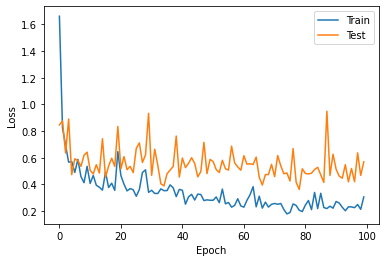

In [ ]:
# Plot the training loss
plt.plot(results.history['loss'], label = 'Train')

# Plot the validation loss
plt.plot(results.history['val_loss'], label = 'Test')

# Name the x and y axises
plt.ylabel('Loss')
plt.xlabel('Epoch')

# Put legend table
plt.legend()

# Show the plot
plt.show()

### Performance Evaluation

Finally, we are going to use the test dataset we created to evaluate the performance of the model.

Use test_on_batch() method with test dataset as parameter

In [ ]:
# Evaluate the performance
test_result = model.test_on_batch(X_test, y_test)

# Print the result
print(test_result)

[0.2716849446296692, 0.9222221970558167]


### AI9041 Convolution and Filters

Hello and welcome back! Look around, we perceive the world in 3D. Beautifully composed music, images, videos. They are all in 3D for us humans, but what about computers? What do they see, how do they perceive the world around them? Well, they only see numbers. The images are numbers, the videos are numbers, the audios are numbers, even texts are numbers. Of course these numbers relate to each other, but how do computers know how?

 

Let’s start with an example. Here we have images of some cars and airplanes, we want to differentiate these two classes. Computers see these images as numbers and if we want to teach computers how to classify them, these numbers need to make sense. Each number alone might not be enough to tell anything about the image. But all of them together will hold useful information. So, computers have to comprehend these numbers in their context, where they are located and how they relate to each other. For this reason, spatial information can be very important. In this video, we will talk about spatial information, convolution and some conventional image processing techniques. Images are 2-dimensional arrays or matrices. In grayscale images, there is only 1 channel and in colored images, there are three channels RGB: red, green, and blue. A pixel in the grayscale image is a single value. And a pixel in an RGB image is an array of 3 values. The value can usually be between 0 to 255 or it can be scaled to 0 to 1. Here 0 represents no color and 1 represents full color. Each pixel can be used as a feature. Thus, the input to the neural network,, is the total number of pixels in the image. For example, in this 32 by 32 image, there are 1024 pixels in total. Since it is grayscale, each pixel only has 1 value, so in order to feed this to our neural network, we need an input layer of 1024 units.

 

This number is big and it will cost us some computation time. But there is a bigger problem with using pixels as features. The model cannot identify which pixels are closer to each other and which ones are far. As you can see, this pixel is closer to this one compared to this pixel. However, a neural network does not discriminate between different pixels. If we want our model to perform better, we need features that consider neighboring pixels, that give us this spatial information. For this, we need to study one of the conventional methods that were used to extract information from the images: Convolution. It is a simple mathematical operation where a weighted sum is calculated of each element and its neighbors. This helps the computer to somewhat understand the spatial context of the data. In convolution, we have a predefined kernel which is also referred to as convolutional filter. We multiply the elements of the kernel, with the elements in the window in the top left corner of the image. Element by element. Then we add these products. And the sum of the products is a new pixel value which is written on the output grid. Then the kernel slides one step to the right side, and the sum of products with this window is calculated, and it is written on the output grid. The kernel slides again and the process is repeated until the kernel has slid over the entire image and the output grid is complete. You might have noticed that the output does not have the same dimensions as the input image due to the edges. But don’t worry now, we will talk about them in upcoming videos.

 

Convolution is a linear process. This means the value of the output pixel is a linear combination of the neighboring input pixels. The most important application of convolution is that, it can extract features that account for the spatial context of the image. For example, consider this vertical edge detection filter. Whenever this filter sees a sudden jump vertically, the corresponding pixel in the output will spike. Similarly, we have a horizontal edge detection which detects the horizontal edges. There are other types of edge detection filters. For example, the Sobel filter. There is also a Laplacian filter. It highlights regions of rapid intensity change and is therefore often used for edge detection. These convolutional kernels are used to extract the important features from the image. One kernel might not be enough to extract the features. So, multiple kernels are used to compute multiple feature maps. And these feature maps can be fed into our neural network. Now, our neural network has context spatial information on more than just the pixels. Convolutional filter can denoise an input. For example, using the so-called mean filter, convolution can help to reduce the unwanted noise from an image. The mean filter averages the content of each window of the input image, and outputs a smoother version of it without any sudden jumps. Now, the salt and pepper noise in the input is removed by taking the local averages. So, when the pixel is black and neighboring pixels are white, the result will be very light gray. And when the pixel is white and all its neighbors are black, the result would be dark gray. Thus, it smoothens the input. So far, we have seen examples from images because it is easier for us humans to comprehend how convolution works with visual data. Images are 2D data but the convolutional filters can be applied to 1D or 3D data as well, they don’t always have to be 2D. For example, we might want to use 1D convolution for audio or textual data, 2D for images and 3D for videos.

 

In this video, we learned that using pixels directly as features may not give all the required information computers need to understand the data. We learned what convolution is, how it is performed and we discussed different types of convolutional kernels. Finally, we discussed how these kernels are used to extract features, which deliver the needed spatial information. The convolutional filters that we discussed were engineered by great computer scientists and mathematicians, but there are only a limited number of defined convolutional filters. And this, limits the information we can extract from the input. But what if the filter values were not fixed and were learned by our model? Now, we can have as many filters as we like and now more information can be extracted. How to do it? Well, stay tuned, that is for our next video. Convolutional Neural Networks, or as we call them CNNs. See you there!

### AI9042 Convolutional Neural Network

Hello again! In the previous video, we learned about convolution and convolutional kernels or filters. We also discussed some of the predefined convolutional filters. But what about the ones that are not predefined? In this video, we will find out how the filter values can be learned by the model, and how feature extraction can happen without manually set filters. All of this will help us learn the most crucial component in almost all the deep learning architectures: Convolutional Neural Networks (CNNs).

 

Convolutional Neural Networks improve the performance of classification models. In addition, they serve as the basis for more complicated tasks and, can be used to solve some common computer vision problems. One such problem is: Semantic segmentation. In semantic segmentation, every pixel in the image is classified. In practice, such models can be used to segment invasive and non-invasive tumor tissues in medical images. Another computer vision problem: Object detection. It is the model which detects different objects in the image and draws bounding boxes around them. Object detection is often used by street surveillance systems that are able to count the people on the streets. Instance Segmentation. Instance segmentation is a combination of semantic segmentation and object detection. It detects each object uniquely and segments it. It is used in autonomous vehicles. It identifies different cars and classifies each pixel of them. These tasks are pretty exciting, aren’t they? In order to understand the complex architectures of these models, we need to understand what CNNs do and how they do it?

 

Convolutional Neural Networks are made of convolutional kernels with learnable filter values. We refer to these filter values as weights because, in convolution, these values are used to take the weighted sum of the input window. Similar to artificial neural networks, we also have a bias term for these filters to accommodate biases of the data. Also, similar to ANNs, these weights and biases are randomly initialized and learned iteratively. In short, we want to learn the features and automate the extraction process so that hand-crafted features are not required. Instead of hard-coded or handcrafted boring filters, we might have some interesting filters like these. You can see some of them will function as edge detectors or blob detectors. When you look at people around you, you see everyone has a different face, unless they are identical twins of course. Even though everyone has a nose, two eyes, two ears, lips, and hair, your brain can still identify everyone individually. What if you only relied on pixel-level information? Or even the information about the edges, sizes, and colors of these facial features? You might have some problems recognizing your friends. This is because your brain does not rely on low-level or simple high-level features. It combines the information from these edges, sizes, and colors and creates even complex features like the shape of the nose, hairstyle, or facial expressions.

 

So why should we limit ourselves to only a simple convolutional neural network? Instead, we can have multiple convolutional layers in the network. Each layer has filters with weights and biases, and an activation function. Here every layer extracts the information from the previous layer and builds up complex information from simple pixel-wise raw data. We saw how Artificial Neural Networks try to mimic the neural networks of our brain. The weights and biases of the neural network are learned according to the loss function. The input to output pipeline is defined, which has components like Convolutional layers and some fully connected neural network layers. The loss is defined, and the aim is to minimize the loss. The CNN model is trained similarly to the ANN, through backpropagation and gradient descent. Nevertheless, the model might learn different features for different types of problems. For example, the model used for classifying different animals may want to use very different features than the model that is trying to locate the animal’s position in the image. The model used for classification might want to extract features like the shape of ears, length of tail, or atmosphere around the animal. Whereas the model used for locating the animals might want to use features like a sudden change in the pixel values or maybe contrastive colors. One problem associated with the convolutional operation is that, it does not work on the borders of the input. When we apply the convolution to an image, the kernel is fit to the upper left corner and slides right at each step. In this process, the borders do not have their pixels in the output and therefore the dimension is reduced. And having multiple convolutional layers means reducing the dimensions of features multiple times. If there is important information on the border, the results might miss it, and we need to fix this problem.

 

For example, if there is a boat in the center and the water on the edges of the images, the model considers the water to be an important marker to classify an object as a boat. It might not classify it as a boat if it doesn’t see water in the scene. To prevent information loss at the borders, we concatenate some numbers to the borders of the input frame. This process is called padding. We can pad by zeros or any other constant, or we can pad by mirroring the edge. Padding helps to retain the shape of the input when extracting the features and allows us to take edges and corners of the input into account. Now we can keep the feature maps with the same dimension as the input image. But some features extracted from these convolutional layers can be redundant, useless, or even add noise to our model. Therefore we also have to make sure to use only the useful or more meaningful features. This will increase the model’s performance, and reduce the computational costs by decreasing the parameters. The Pooling layer is responsible for reducing the size of the Convolved Features. There are two most common types of pooling: max pooling and average pooling. In the max-pooling layer, the input is divided into grids, and the maximum value of each block is the layer’s output. In the average pooling layer, each block’s average value is the layer’s output. Usually, max pooling is used in convolutional neural networks because it significantly removes the noise. There are no weights or biases of the pooling layer. We can say that there are no learnable parameters in the pooling layer, which significantly reduces the feature block size. With max-pooling layers added to our network after every convolutional layer, a typical convolutional neural network model for classification looks like this.

 

In the first half of the architecture, features are extracted from the image using convolutional and pooling layers. We can say that this block has all the necessary information about the input encoded into it. We flatten it to 1D so that our fully-connected neural network can take it as an input and perform the classification task. It takes millions of samples to train a good classification model based on this architecture. And deep learning models have to be trained from scratch every time. Wouldn’t it be great if there was a way to transfer already learned information from a trained model to an untrained model? We have just seen that CNN based feature extractors can be used to extract some useful features that we can input to our network. Fortunately, there are some existing models that have a well-trained feature extractor. So instead of training the feature extractor from scratch, we can use the weights of pretrained models and only train the classification part of the model according to the given problem. In this case, we already have optimized values for the weights and biases, and there is no need to adjust them again. This process is called transfer learning and it greatly helps when we are training a CNN model with less data.

 

Wow. The good news is that, you have learned how machines can extract the features themselves, and now you do not need to worry about finding useful features for the model. The model will find them by itself. We have learned a very important chapter of deep learning: CNNs. We have also discussed pooling layers and padding. That is all for now. Now, it is time to practice what you have learned. In the next video, we will build a convolutional neural network that takes images as input and extracts the features, and then classifies them. See you there!

### AI9051 Build a Convolutional Neural Network

Hello again! In this project we will gain some hands-on experience in “Convolutional Neural Networks”, CNNs. With the help of TensorFlow’s Sequential API we learnt in the previous project, we’ll create a model object and add convolutional layers, dropouts etc. After that we’ll compile and train the model and check the results. Before we start, don’t forget to change the Runtime type to GPU in Google Colab. The dataset we’ll use for this project is called CIFAR-10. This time, we will not have numerical data and there are no predefined features. Instead, the dataset consists of 60 000 32 by 32 color images of 10 classes, with 6000 images per class. The classes are: airplane, automobile, bird, cat, deer, dog, frog, horse, ship and truck. This is a multiclass classification problem and it is perfectly suitable for a convolutional neural network to solve.

 

Let’s dive into coding! We start by importing the required libraries. In this project we will need Tensorflow, NumPy and matplotlib. The CIFAR-10 dataset is included in the Keras module. It is already divided into train and test datasets so we can easily download it and assign it to the X_train, y_train, X_test and y_test variables. If this wouldn’t be the case, we would have to create these sets manually. We can print the lengths of the X_train and X_test sets using the len function to see how they are distributed. The ratio is 5 to 1. Before we move on with the preprocessing of the data, let’s take a look at a sample to see what we are dealing with. We pick a random index in the X test set and print it. The numbers we see here are pixel values. This is how computers see images. But like this, it doesn’t mean much to us. Let’s visualize this sample. We can use a function included in the Matplotlib library, imshow. imshow takes a Numpy array as input and shows us the corresponding image. Let’s also print the shape of the image. This tuple means that we have a 32 by 32 image with 3 channels. Note that RGB images, in other words color images, have 3 channels for red, green and blue. Great! With this knowledge we can adjust our dataset.

 

Remember that we need three unique datasets to train, validate and test a deep learning model. Since we already have train and test sets, we just need some data for validation. We can use the last 10 000 images of the train set for this. Let’s set it up. Then, we check the lengths of the sets again. 4 to 1 to 1. This ratio is appropriate. As we did with the numerical data in our last project, normalizing the pixel values of the image will greatly help with model training. Pixel values in the images are between 0 and 255. By dividing these values by 255 we’ll scale them between 0 and 1. That was it for the preprocessing of the data! We can create our model now. First things first; let’s create a model object. Now, here comes the exciting part, are you ready to add the convolution layers? With Keras’s Conv2D layer, we add our first convolution layer. There are parameters we need to specify: For the “Number of nodes”, we put 32 and for the “Kernel size” we specify 3 by 3. There is also the parameter “Strides”: This parameter specifies the strides of the convolution kernel along the height and width of the image. For example, if the stride is 1, the filter will move 1 pixel at a time. Next, we need to specify the “Padding” and “Activation function”. As you might remember, we pad to prevent information loss on the borders of the images. We want the padding to be the same as the border values and we put ReLU as the activation function. We could use any activation function here, activation functions are hyperparameters so we have to figure out the best one by trial and error. Other functions that could fit this problem are: “TanH”, “Leaky ReLU” or “ELU”. The last parameter we set is the “Input shape”. Our input has the shape (32,32,3).

 

The next part is to add one convolution layer, one max pooling layer and one convolution layer again. Remember that we add the max pooling layer to reduce the size of the image and make some detected features more robust. This also speeds up the training. We will specify 64 nodes for the convolution layers this time. This is a number we choose randomly and can adjust later on. The remaining parameters are the same as in the input layer. Now we move on to the classification part. In order to connect the 2D convolution layers and 1D dense layers we have to bring them to the same dimensions. This is where the “flatten” method comes to our help. In other words we take all pixel values and put them on a 1D array one by one. After that, we add two dense layers. Each with 64 nodes, ReLU activations and 0.5 dropouts. Don’t forget that these are arbitrary numbers that can be adjusted later on to improve the performance. It’s time for the output layer. Since we have 10 classes we add 10 nodes and use the Softmax activation function. Remember that for multiclass classification problems, we use Softmax at the output layer. Finally, we compile the model. We define the optimizer “Adam”, our go-to optimizer, and since we are trying to solve a multiclass classification problem we use the “Sparse Categorical Cross Entropy” loss function. With this, our model is ready to be trained!

 

In our dataset we have 60000 images, we use 40000 of them for training. But we have to be careful! Training with all of these pictures at the same time would quickly drain our memory and other hardware resources. To prevent this, we use a technique called mini-batching. With mini-batching, instead of looking at all samples at the same time, the model will only see a small number of samples at a time. This method has many advantages; mini-batching increases model training significantly by speeding up the training and using less memory. Also if we have more than one GPU we can use these GPUs to train different batches at the same time. So, we need to add a new parameter here called “batch_size”. And as you can probably guess, it is another hyperparameter, meaning we’ll have to find the optimum value for it. Sometimes lower is better and other times higher is better. But since computers work with binary numbers, choosing a number which is a power of 2 is highly recommended so that the computation speed is increased. Let’s try it out with a batch size of 128 for 50 epochs. This will take some time.

 

Our training is done! And what comes after the training? The performance evaluation. We’ll start by creating a graph to visualize the change of loss over time. Now, let’s do the same thing for accuracy. We see in the graphs that, around the 20th epoch, the model started to overfit. We can say that because both training and evaluation lines start to get further apart from each other. One method of preventing this would be using the “Early Stopping” method. Early stopping is stopping the training process around the epoch which model starts to overfit. So if we train the model only for 20 epochs we would prevent overfitting. We can also use the test dataset to calculate the loss and accuracy and get more insights about performance of the model. We have a model with 1.21 loss and over 70% accuracy. If these results are enough for the problem at hand, we don’t have to further optimize the model. But remember that we want the loss to be as close to 0 as possible. And accuracy as close to 100% as possible. So, if necessary, we can do hyperparameter optimization to try getting closer to these values. Let’s check the ship image from previous cells to see if it was classified correctly. We use the reshape method because the predict method expects a batch of images to predict. But we want to make prediction on a single image. By reshaping the image to (1,32,32,3) we say that we have one image of 32 by 32 by 3. Then we print the prediction results.The output gives the probability of an image belonging to each class. To find the highest probability we can use argmax and max methods. argmax returns the index of the highest value, which is the predicted class, and max returns the probability. Let’s find these and assign them to variables.

 

Let’s print the prediction. This image belongs to class 8 with probability of 0.99. So,this means that there is a ninety nine percent probability that it belongs to class 8. We know that class 8 is the “ship” class. So we can say that model predicted this image correctly. We said earlier that we have a slight overfitting situation. But we can overcome this by fine-tuning the hyperparameters. Now change the following parameters to see if you come up with a better performing model: number of convolutional layers, number of kernels in convolutional layers, kernel size, strides, activation functions, number of hidden layers in classification part, number of nodes in hidden layers in classification part, optimizer, batch size, number of epochs. After that, check a couple of images yourself to see if they are predicted correctly. You can use the course hub to exchange with our experts and your peers and share your results if you like!

 

In this project we learned how to create a convolutional neural network model to classify images. In this exercise, we also explored a practical concept called mini-batching , which is highly important when it comes to training CNNs. See you in the next session!

In this project, we will build a convolutional neural network to solve a multiclass image classification problem. For this we'll use the "CIFAR-10" dataset available on Keras. It includes 60000 32 by 32 images of 10 classes.

#### Importing the required libraries

We'll start with importing required libraries.

Use the keyword "import".

In [ ]:
# Import TensorFlow
import tensorflow as tf

# Import Numpy and Matplotlib
import matplotlib.pyplot as plt
import numpy as np

### Dataset

Let's download the CIFAR-10 dataset which is included in Keras and assign it to the corresponding variables X_train, y_train, X_test, y_test. 

Use the datasets.cifar10.load_data() function of the Keras.

In [ ]:
# Download the cifar-10 dataset included in Keras.
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

Now, we can print the number of samples in the X_train and X_test datasets to see how the dataset is distributed.

Use f-strings for this.

In [ ]:
# Print the number of samples
print(f"X_train: {len(X_train)}")
print(f"X_test: {len(X_test)}")

X_train: 50000
X_test: 10000


Before we move on with the preprocessing of the data, we can print a random sample to see that the data looks like.

In [ ]:
# Print a sample from X_test dataset
print(X_test[789])

[[[100 111 134]
  [ 98 110 132]
  [ 98 109 131]
  ...
  [ 69  89 114]
  [ 67  87 113]
  [ 66  86 111]]

 [[ 98 109 131]
  [ 95 106 128]
  [ 94 105 127]
  ...
  [ 65  85 110]
  [ 64  84 109]
  [ 63  83 107]]

 [[ 94 105 127]
  [ 92 103 125]
  [ 92 103 125]
  ...
  [ 63  83 108]
  [ 62  82 107]
  [ 60  80 105]]

 ...

 [[ 13  27  40]
  [ 12  26  39]
  [ 12  26  39]
  ...
  [  4   6  21]
  [  5   7  22]
  [  4   7  22]]

 [[ 12  24  38]
  [ 14  26  39]
  [  9  21  34]
  ...
  [  3   5  19]
  [  3   5  20]
  [  5   7  22]]

 [[ 14  23  34]
  [ 12  21  31]
  [  9  19  29]
  ...
  [  4   4  17]
  [  4   5  18]
  [  5   5  18]]]


The numbers we see here are pixel values. This is how computers see images. But like this, it doesn't maen much to us. Let's visualize this sample.

Convert the pixel values into an image by using the imshow() function of the Matplotlib library.

Print the shape of the image using shape.

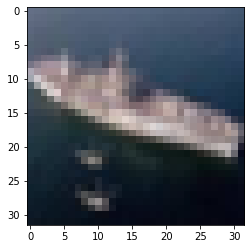

(32, 32, 3)


In [ ]:
# Use the .imshow() function and show the plot
plt.imshow(X_test[789])
plt.show()
# Print the shape of the sample image
print(X_test[789].shape)

### Preprocessing

Great! With this knowledge we can adjust our dataset for further use.

We need three datasets: train, validate, and test. We can separate 10000 images from the train dataset and use it as the validation dataset.

You can use list slicing for this.

In [ ]:
# Create the validation datasets and assign the last 1000 images of X_train and y_train
X_val = X_train[40000:]
y_val = y_train[40000:]

# Create new train datasets and assign the first 40000 images of X_train and y_train
X_train = X_train[:40000]
y_train = y_train[:40000]


Let's check the number of samples in each dataset to see the final results.

Use f-strings for this.

In [ ]:
# Print the lengths of the each dataset
print(f"X_train: {len(X_train)}")
print(f"X_val: {len(X_val)}")
print(f"X_test: {len(X_test)}")

X_train: 40000
X_val: 10000
X_test: 10000


### Normalization

Since pixel values are between 0 and 255, dividing these values by 255 will scale each of them to values between 0 and 1. 

Divide each dataset by 255.

In [ ]:
# Divide each dataset by 255
X_train = X_train/255
X_val = X_train/255
X_test = X_test/255

### Constructing the neural network

That was it for the preprocessing of the data!

Now we can create out model. First things first, we start by creating a model object using Sequential API of Keras.

Use tf.keras.Sequential() to create a model object.

In [ ]:
# Create a model object
model = tf.keras.Sequential()

### Feature extraction layers

For the first two layers, we add a convolution and max pooling layer.

Use tf.keras.layers.Conv2D() and tf.keras.layers.MaxPooling2D() to create the layers.

Use .add() method of the object to add the layer.

In [ ]:
# Add a concolution and max pooling layer
model.add(tf.keras.layers.Conv2D(32, 
                                 kernel_size = (3, 3), 
                                 strides = (1, 1), 
                                 padding = "same", 
                                 activation = "relu", 
                                 input_shape = (32, 32, 3)))

model.add(tf.keras.layers.MaxPooling2D((2,2)))

Then we add more layers. One concolution, one max pooling, and one convolution layer again.

Use tf.keras.layers.Conv2D() and tf.keras.layers.MaxPooling2D() to create the layers.

Use .add() method of the object to add the layer.

In [ ]:
# Add more convolution and max pooling layers
model.add(tf.keras.layers.Conv2D(64, 
                                 kernel_size = (3, 3), 
                                 strides = (1, 1), 
                                 padding = "same", 
                                 activation = "relu"))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(64, 
                                 kernel_size = (3, 3), 
                                 strides = (1, 1), 
                                 padding = "same", 
                                 activation = "relu"))

### Flatten 

To connect the 2D convolution and 1D dense layers we have to "flatten" the convolution layer.

Use tf.keras.layers.Flatten() to flatten the layers.

Use .add() method of the object to add the layer.

In [ ]:
# Flatten the convolution layer
model.add(tf.keras.layers.Flatten())

### Classification Layers

Now that we have the features extracted, we can move on to the classification part. We add two dense layers each with 64 nodes, 0.5 dropout and ReLU activation functions.

Use tf.keras.layers.Dense() to create the layers.

Use .add() method of the object to add the layer.

In [ ]:
# Add the dense layer and dropout layer
model.add(tf.keras.layers.Dense(64, activation = "relu"))
model.add(tf.keras.layers.Dropout(0.5))

# Add the dense layer and dropout layer
model.add(tf.keras.layers.Dense(64, activation = "relu"))
model.add(tf.keras.layers.Dropout(0.5))


### Output Layer

As the last part of our neural network, we add the output layer. The number of nodes will be equal to the number of target classes which is 10 in our case. We'll use the softmax activation function in the output layer.

Use tf.keras.layers.Dense() to create the layer.

Use .add() method of the object to add the layer.

In [ ]:
# Add the output layer
model.add(tf.keras.layers.Dense(10, activation = "softmax"))

### Optimizer

Now we have the structure of our model. To configure the model for training we'll use the .compile() method. Inside the compile method we have to define the following:

* "Adam" for optimizer

* "Sparse Categorical Crossentropy" for the loss function

Construct the model with the .compile() method.

In [ ]:
# Compile the model
model.compile(optimizer = "adam", 
              loss = "sparse_categorical_crossentropy", 
              metrics = ["accuracy"])

### Training the Model

It's time to train the model. We'll give the X_train and y_train datasets as the first two arguments. These will be used for training. And with the validation_data parameter we'll give the X_val and y_val as a tuple.

Use .fit() method of the model object for the training.

In [ ]:
# Train the model for 50 epochs
results = model.fit(X_train, y_train, 
                    batch_size = 128, 
                    epochs = 50, 
                    validation_data = (X_val, y_val))

Epoch 1/50
313/313 [==============================] - ETA: 0s - loss: 2.0269 - accuracy: 0.2218

ValueError: ignored

### Visualize the Result

After the model is trained, we can create a graph to visualize the change of loss over time. Results are held in:

* results.history["loss"]

* results.history["val_loss"]

Use plt.show() to display the graph.

In [ ]:
# Plot the training loss
plt.plot(results.history["loss"], label = "loss")

# Plot the validation loss
plt.plot(results.history["val_score"], label = "val_score")

# Name the x and y axises
plt.xlabel("Epoch")
plt.ylabel("Loss")

# Put legend table
plt.legend()

# Show the plot
plt.show()




Now do the same thing for accuracy.

Accuracy scores can be found in:

  * results.history["accuracy"]

  * results.history["val_accuracy"]

In [ ]:
# Plot the training accuracy
plt.plot(results.history["accuracy"], label = "accuracy")

# Plot the validation accuracy
plt.plot(results.history["val_accuracy"], label = ["val_accuracy"])

# Name the x and y axises
plt.xlabel("Epoch")
plt.ylabel("Accuracy")

# Put legend table
plt.legend()

# Show the plot
plt.show()

Performance evaluation

Let's use the dataset we created to evaluate the performance of the model.

Use test_on_batch() method with test dataset as parameter.

In [ ]:
# Evaluate the performance
model.evaluate(X_test, y_test)

Try a prediction

Next, we take the sample we selected at the beginning and make a prediction on it.

Reshape the image to (1, 32, 32, 3)

Use the .prediction() method of the model object.

In [ ]:
# Make prediction on the reshaped sample
prediction_result = model.predict(X_test[789].reshape(1, 32, 32, 3))

# Print the prediction result
prediction_result


Finally, we find the predicted class and prediction probability and print the results.

Use .argmax() to find the class.

Use .max() to find the probability.

In [ ]:
# Find the predicted class
predicted_class = prediction_result.argmax()

# Find the prediction probability
predicted_probability = prediction_result.max()

# Print the results
print(f"This image belongs to class {predicted_class} with {predicted_probability} probability %")

### AI9061 Recurrent Neural Networks

Hello and welcome back! Before we begin, I would like to ask you a question this time. Let’s say, you ate pizza for lunch, would you like to eat pizza for dinner as well? Most likely you would not, right? So, your decision is influenced by an event that has happened before. If we want our deep learning model to suggest what to eat for dinner today, we need to provide the information regarding what we had for lunch. Similarly, financial markets use information from the past, to predict future stock value. Brokers see the market trends if they are rising or falling, before they make any decision. This problem can be formulated, and a deep learning model can be used to predict the stock prices, using the information from the past. In this video, we will learn how to train deep learning models to understand temporal information. We will discuss Recurrent Neural Networks, or RNNs. One of the most exciting deep learning models.

 

We understand the importance of temporal information. Now, it is time to teach computers how to make use of information from the past. One of the decades-old ways of solving this problem is a recurrent neural network. A traditional recurrent neural network has an input layer, a hidden state, and an output layer. The hidden state is different from the hidden layer of an Artificial Neural Network. It represents information from previous time steps. RNNs are designed to process the sequential data. Sequential data is the one in which each data point is connected to the previous, and/or the future datapoint. The hidden state is responsible for summarizing and storing information from the past. Since the RNN model takes the data points from the past, it has to track the time. A timestep refers to the number of inputs that has been passed to the network as a sequence. A timestep of 10 means, the previous 9 data points and the current point will be used to predict the output. A typical RNN model takes the current input x at time step t, and “the hidden state a” of time step t-1. The RNN model returns the output y of time step t and “the hidden state a” of time step t. Because the hidden state passed through the network, the timestep of the hidden state is updated to t. Let’s check these steps together. The model takes input and multiplies it by its associated weight – it takes the hidden state and multiplies it by its associated weights – adds these two products and a bias – and applies the activation function. The result of these steps, will give us the input to the output layer and also the hidden state for the next time step. Then, the same steps will be implemented for the next input. This is how we can use RNNs to take into account the historical information. You can see that if we increase the length of the input sequence, the model size does not change, because it has one hidden state that gets updated over time.

 

Now, let’s see different types of RNNs and their applications. One-to-many. We can input an image, and it can generate a sequence of words (a sentence) that is the caption of the image. Many-to-one. Consider the example from financial markets where the previous information sequence is passed as input and the model predicts the future price. Many-to-many, where the length of the input and output is the same. For example, object tracking in a video. In this case, video frames are the input and the location of the object in each frame is the output. There can also be many-to-many RNNs with different lengths of input and output. You probably have used Google translate before. The length of the sentence in English, might not be the same as the translated French sentence. We learned, why we may want to use temporal information in our models and how RNNs can do that to generate an output or a sequence of output. We discussed different architectures of the RNNs and their applications. However, like everything else, RNNs are not perfect. RNNs are slow. Sometimes very slow. Plus, it is difficult for the hidden state to represent the information from long ago, and thus, it has difficulty accessing information from the far past. On top of that, RNNs are sometimes very hard to train. The backpropagation is done at each point in time. RNN can do great things, but training an RNN is a tricky task. In the next video, we will talk about some tips and tricks, to train an RNN. Stay tuned.

### AI9062 Training Recurrent Neural Networks

Welcome Back! In the last video, we learned how recurrent neural networks can account for information from the past, when computing the output. We also discussed some exciting applications of RNNs. But training an RNN is not a simple task. In this video, we will learn how to train a recurrent neural network, and address the problems associated with the training.

 

The first step of training is to compute the loss. In the case of a recurrent neural network, the final loss, is the sum of the loss at every time step. Backpropagation is done at each point in time. It means that, if the input sequence of length10 is fed to the network, the backpropagation will calculate the gradient from the first time step, to the last time step. And then all these parameters will be updated accordingly. If the sequences are long, the hidden state has the burden of representing the information from all the previous time steps. This means that, the computation from the first time step might be impacting the computation on the output on the 78 time step, for example. We use the same weights for hidden states throughout all the time steps. And if we compute the gradient, the gradient at the first step has weight W, with the power of 78. This might cause the gradients to explode, which means the gradient goes to infinity. And the RNN might not be able to learn, because the gradient descent will not be meaningful and the training will be very unstable.

 

For example, let’s say you want to train a text prediction model that takes words as input as you type them, and it predicts the next word that you might type. If you face the exploding gradient problem, your loss will explode and your training will not be successful. To cope with the exploding gradient problem, a technique called gradient clipping can be used during backpropagation. Here we cap the maximum value of the gradient. If the gradient exceeds a certain maximum value threshold, we assign the capping value to it. This way no number will reach infinity. You may also face a problem of vanishing gradients, where the gradients become zero or very close to zero. This usually happens when RNNs are not able to capture long term dependencies in the input sequence. If you encounter the vanishing gradient problem in your text prediction model, the whole context of the text might be missed, because your predictions will be based just on the last few words. To solve the vanishing gradients problem, the architecture of the simple RNN unit has to be modified and we need to introduce two modified versions of RNNs. The 2 most commonly used types of RNNs to address these issues are Gated Recurrent Units, GRUs, and Long Short-Term Memory Units, LSTMs. GRUs and LSTMs deal with the vanishing gradient problem of traditional RNNs. Here is how.

 

The GRU has two gates, a reset gate and an update gate. Gates are nothing but neural networks, each gate has its own weights and biases. In the GRU, we refer to the hidden state as the candidate cell. And this candidate cell will also serve as the output. The update gate decides if the cell state should be updated with the candidate state, the current activation value, or not. The reset gate is used to decide whether the previous cell state is important or not. Sometimes the reset gate is not used in a simple GRU. The cell state for the next time step is dependent on the update gate. It may update the cell state by adding some useful information and by removing some information that is not required. Let’s see how this architecture works with an example. We can use the text prediction model we mentioned. Imagine you are typing the sentence and the model needs to predict the next word. Useless or redundant information is dropped and only useful information is carried to the next time step by the candidate cell. This does not let the candidate cell to be overwhelmed with information and thus, it can simply solve the vanishing gradient problem. Now that you are aware of RNN and GRU, let’s quickly learn how LSTM works. Similar to GRUs in many ways, LSTMs are used to address the issue of disappearing gradients. In LSTMs there are three gates: Input gate, forget gate and output gate. LSTMs have cell state as well as hidden state.

 

The input gate decides what relevant information can be added from the current step. The forget gate controls what is kept vs forgotten, from the previous cell state. In layman’s terms, it will decide how much information from the previous state should be kept and forget the rest. The output gate controls which parts of the cell are output to the hidden state. It will determine what the next hidden state will be. Like GRUs, LSTMs only keep the useful information and tend to discard what is unnecessary. This solves our vanishing gradients problem. The key difference between GRUs and LSTMs is that, GRUs have two gates that are reset and update, while LSTMs have three gates that are input, output, and forget. GRUs are less complex than LSTMs because they have fewer gates. If the dataset is small then GRUs are preferred, otherwise LSTMs for larger datasets. This was a tough lesson but you made it. In this video, we learned how RNNs are trained. What are the major issues RNNs run into, and what causes exploding and vanishing gradient problems? We learned how to solve exploding gradient problems with the gradient clipping technique and vanishing gradient problems with GRU and LSTM. With this video, your lesson on RNN is completed. Now it is time to practice with some practical examples. See you there.

### Build a Recurrent Neural Network

Welcome to the last guided project of this course! In this project, we will build a recurrent neural network for sentiment classification. In sentiment classification, we identify if a text includes positive, negative or neutral opinions and label them. This method can be used to understand how people feel about a product or service based on comments they leave. For this exercise, we’ll explore how people feel about movies. We will use the “IMDB Movie Review Dataset”. This dataset provides 50000 highly polarized movie reviews categorized as positive or negative, so we have a binary classification problem. We’ll tackle this problem by creating a LSTM neural network. As always we’ll start with preprocessing the data, then we’ll construct and train our model and finally evaluate and fine-tune it.

 

Let’s start by importing the required libraries. We’ll use Tensorflow, NumPy and Matplotlib. Next, we need to get our data. For this, we download the IMDB dataset which is included in Keras and already divided into train and test sets. We can directly assign it to the corresponding variables. While downloading this dataset from TensorFlow, there is another parameter we can set; num_words. If we specify the number ‘n’ for this parameter, only the most frequent ‘n’ words will be downloaded, otherwise all words will be kept. We want to include the most frequently used 10000 words. Of course, we can select a higher number but doing so will require a lot of memory. Let’s also have a look inside our dataset. We print X_train[0] and check the data we have. We can see that we have an array of lists where each list corresponds to a different movie review. Inside these lists we see a lot of numbers. The actual movie reviews consisted of words, but because we can’t do mathematical operations on string data, these words had to be converted to numbers. Luckily, this was already done for us; each word is mapped to a specific number in the dataset. For example the word “good” is mapped to the number 49, the word “bad” is mapped to the number 75. If this wasn’t done by default, we could easily create a script where we assign numbers to words. Now let’s print the lengths of the X_train and X_test variables to see the number of samples and the distribution between the datasets. There are 25000 reviews, or samples, in each set. This means a 50-50 split. Remember that we need three datasets for deep learning training: train, validation and test datasets with a split ratio of 80-10-10. First let’s combine the existing train and test sets to create one big dataset. After that we’ll split it. To do that we concatenate both “samples” lists and “labels” lists. Now we have two datasets of samples and labels.

 

Before dividing these datasets, we can already do some preprocessing operations, so we won’t have to do this three times for each dataset later. What we’ll be doing now is called ‘padding’. Since the movie reviews are of different lengths, we can add some zeros to the beginning of the reviews, just like we did on CNNs, so that all samples will be at the same length. The max_len parameter here will resize all reviews to 1024words. Any samples below this length will get extra zeros and any reviews above this length will be trimmed. If we hadn’t specified any number for the max_len parameter here, all sequences would have been padded to the length of the longest individual sequence. In our case this would significantly increase the training time. By the way, when you get to the hyperparameter tuning part later, you can try different maximum lengths and see if you can find the best performing one. Padding is done! Now we can split the samples and labels to train, validation and test datasets with a 80-10-10 ratio. We simply use the indices to define them. To be safe, we print the lengths to check if everything worked out. Great! Our dataset is ready to use!

 

We can start to build our model. First, we create a model object. The first layer we will add is a so-called “embedding layer”. Word embedding is a method to represent words or text in a numerical way. It allows us to encode meaning to words by representing them in the form of vectors in a vector space. Here, words that are expected to have a similar meaning are closer to each other. In our case, we will translate 10000 words we have to a 256-dimensional plane. Remember that the input layer is the data we have. Layer we are adding here is not the input layer but the layer after that. By using the input_dim parameter, we specify that the input layer includes 10000 words as inputs, this means that we add the input layer without adding another layer separately, but with using the input_dim parameter. After embedding, we add dropout. Next, we’ll add an LSTM gate, in other words, an LSTM layer. We specify the number of nodes. Now we add dropout to the LSTM layer. And a dense layer with dropout. And lastly, we add an output layer. Remember that in multi-class classification problems the number of nodes in the output layer would be equal to the number of classes and we would use softmax activation function. In this project, we are trying to make a binary classification. So the output layer will have only one node and a sigmoid activation function. With the sigmoid activation function, the network will output a value between 0 and 1. So if the value is below 0.5 it will be class 0 which means the class of negative reviews and if above,the class will be 1 for positive reviews.

 

Let’s build the model using the compile method. As always we’ll use the adam optimizer. This time we’ll be using the “Binary Cross Entropy” loss function because this is a binary classification problem. Remember that if we had more than two classes we would have to use “Sparse Categorical Cross Entropy”. We are almost there! Now we train it for 5 epochs because training this model takes so much time since there are many parameters the model has to adjust. You try different numbers of epochs to find the best performing model. Great, our model is done! Let’s see how well it performs. As usual, we can create graphs to review the change of the loss and accuracy. Let’s visualize the change of the loss first. And then the change of the accuracy.

 

We can see from both graphs that there is no overfitting. The lines in both graphs converge in a good way. But we only trained this model for 5 epochs. Would training for longer lead to a better model or just overfitting? You’ll figure out that in the hyperparameter tuning part. Let’s evaluate the model using X_test and y_test datasets. The loss value is 0.24 and the accuracy is 0.90. Even though the accuracy is relatively high, maybe we can improve its performance with hyperparameter tuning. Now let’s pick a single sample randomly and see if the model predicts correctly. The predict method works on batches of data but since we are predicting only on one sample, we have to reshape the sample. We are going to reshape the review to 1 by 1024. Remember that we padded each review to have the length of 1024. Then we print the prediction result and the label that the sample has in the dataset to compare them. Our model output 0.2. Remember that if the output is smaller than 0.5 we say it belongs to 0. And since the result is very close to zero we can say that model predicted this review as a “negative” one. The label is also zero so we can conclude that the model made a correct prediction.

 

It’s time for fine-tuning the model. But before that, remember the parameter we set at the beginning? You can play with the num_words parameter of the “load_dataset” function and the maxlen parameter of the “pad_sequences” function to see how those affect the model training and performance. After doing that, change the following parameters: number of units on the LSTM layer, dropout rate, recurrent dropout rate, optimizer and try to find the best performing model.

 

Now we know how basic sentiment analysis works. In this project we learned how to create a RNN using TensorFlow, how to do embedding and padding and how to use LSTM in a real life problem. We also saw how binary and multi-class classification differentiate in practice. This means we have taken our first step towards one of the major artificial intelligence topics: natural language processing.

 

Congrats! You made it to the end of the last guided project. As we always say, it is your turn to practice more now!

### AI9071 Build a Recurrent Neural Network

Welcome to the last guided project of this course! In this project, we will build a recurrent neural network for sentiment classification. In sentiment classification, we identify if a text includes positive, negative or neutral opinions and label them. This method can be used to understand how people feel about a product or service based on comments they leave. For this exercise, we’ll explore how people feel about movies. We will use the “IMDB Movie Review Dataset”. This dataset provides 50000 highly polarized movie reviews categorized as positive or negative, so we have a binary classification problem. We’ll tackle this problem by creating a LSTM neural network. As always we’ll start with preprocessing the data, then we’ll construct and train our model and finally evaluate and fine-tune it.

 

Let’s start by importing the required libraries. We’ll use Tensorflow, NumPy and Matplotlib. Next, we need to get our data. For this, we download the IMDB dataset which is included in Keras and already divided into train and test sets. We can directly assign it to the corresponding variables. While downloading this dataset from TensorFlow, there is another parameter we can set; num_words. If we specify the number ‘n’ for this parameter, only the most frequent ‘n’ words will be downloaded, otherwise all words will be kept. We want to include the most frequently used 10000 words. Of course, we can select a higher number but doing so will require a lot of memory. Let’s also have a look inside our dataset. We print X_train[0] and check the data we have. We can see that we have an array of lists where each list corresponds to a different movie review. Inside these lists we see a lot of numbers. The actual movie reviews consisted of words, but because we can’t do mathematical operations on string data, these words had to be converted to numbers. Luckily, this was already done for us; each word is mapped to a specific number in the dataset. For example the word “good” is mapped to the number 49, the word “bad” is mapped to the number 75. If this wasn’t done by default, we could easily create a script where we assign numbers to words. Now let’s print the lengths of the X_train and X_test variables to see the number of samples and the distribution between the datasets. There are 25000 reviews, or samples, in each set. This means a 50-50 split. Remember that we need three datasets for deep learning training: train, validation and test datasets with a split ratio of 80-10-10. First let’s combine the existing train and test sets to create one big dataset. After that we’ll split it. To do that we concatenate both “samples” lists and “labels” lists. Now we have two datasets of samples and labels.

 

Before dividing these datasets, we can already do some preprocessing operations, so we won’t have to do this three times for each dataset later. What we’ll be doing now is called ‘padding’. Since the movie reviews are of different lengths, we can add some zeros to the beginning of the reviews, just like we did on CNNs, so that all samples will be at the same length. The max_len parameter here will resize all reviews to 1024words. Any samples below this length will get extra zeros and any reviews above this length will be trimmed. If we hadn’t specified any number for the max_len parameter here, all sequences would have been padded to the length of the longest individual sequence. In our case this would significantly increase the training time. By the way, when you get to the hyperparameter tuning part later, you can try different maximum lengths and see if you can find the best performing one. Padding is done! Now we can split the samples and labels to train, validation and test datasets with a 80-10-10 ratio. We simply use the indices to define them. To be safe, we print the lengths to check if everything worked out. Great! Our dataset is ready to use!

 

We can start to build our model. First, we create a model object. The first layer we will add is a so-called “embedding layer”. Word embedding is a method to represent words or text in a numerical way. It allows us to encode meaning to words by representing them in the form of vectors in a vector space. Here, words that are expected to have a similar meaning are closer to each other. In our case, we will translate 10000 words we have to a 256-dimensional plane. Remember that the input layer is the data we have. Layer we are adding here is not the input layer but the layer after that. By using the input_dim parameter, we specify that the input layer includes 10000 words as inputs, this means that we add the input layer without adding another layer separately, but with using the input_dim parameter. After embedding, we add dropout. Next, we’ll add an LSTM gate, in other words, an LSTM layer. We specify the number of nodes. Now we add dropout to the LSTM layer. And a dense layer with dropout. And lastly, we add an output layer. Remember that in multi-class classification problems the number of nodes in the output layer would be equal to the number of classes and we would use softmax activation function. In this project, we are trying to make a binary classification. So the output layer will have only one node and a sigmoid activation function. With the sigmoid activation function, the network will output a value between 0 and 1. So if the value is below 0.5 it will be class 0 which means the class of negative reviews and if above,the class will be 1 for positive reviews.

 

Let’s build the model using the compile method. As always we’ll use the adam optimizer. This time we’ll be using the “Binary Cross Entropy” loss function because this is a binary classification problem. Remember that if we had more than two classes we would have to use “Sparse Categorical Cross Entropy”. We are almost there! Now we train it for 5 epochs because training this model takes so much time since there are many parameters the model has to adjust. You try different numbers of epochs to find the best performing model. Great, our model is done! Let’s see how well it performs. As usual, we can create graphs to review the change of the loss and accuracy. Let’s visualize the change of the loss first. And then the change of the accuracy.

 

We can see from both graphs that there is no overfitting. The lines in both graphs converge in a good way. But we only trained this model for 5 epochs. Would training for longer lead to a better model or just overfitting? You’ll figure out that in the hyperparameter tuning part. Let’s evaluate the model using X_test and y_test datasets. The loss value is 0.24 and the accuracy is 0.90. Even though the accuracy is relatively high, maybe we can improve its performance with hyperparameter tuning. Now let’s pick a single sample randomly and see if the model predicts correctly. The predict method works on batches of data but since we are predicting only on one sample, we have to reshape the sample. We are going to reshape the review to 1 by 1024. Remember that we padded each review to have the length of 1024. Then we print the prediction result and the label that the sample has in the dataset to compare them. Our model output 0.2. Remember that if the output is smaller than 0.5 we say it belongs to 0. And since the result is very close to zero we can say that model predicted this review as a “negative” one. The label is also zero so we can conclude that the model made a correct prediction.

 

It’s time for fine-tuning the model. But before that, remember the parameter we set at the beginning? You can play with the num_words parameter of the “load_dataset” function and the maxlen parameter of the “pad_sequences” function to see how those affect the model training and performance. After doing that, change the following parameters: number of units on the LSTM layer, dropout rate, recurrent dropout rate, optimizer and try to find the best performing model.

 

Now we know how basic sentiment analysis works. In this project we learned how to create a RNN using TensorFlow, how to do embedding and padding and how to use LSTM in a real life problem. We also saw how binary and multi-class classification differentiate in practice. This means we have taken our first step towards one of the major artificial intelligence topics: natural language processing.

 

Congrats! You made it to the end of the last guided project. As we always say, it is your turn to practice more now!

### Building a Recurrent Neural Network

#### Sentiment Analysis

In thist project, we will build a Long Short - Term Memory (LSTM) neural network to solve a binary sentiment analysis problem.

For this we'll use the "IMDB Movie Review Dataset" available on Keras. It includes 50000 highly polarized movie reviews categorized as positive or negative.

### Importing the Required Libraires

We'll start with importing required libraries.

Use the keyword "import".

In [ ]:
# Import TensorFlow
import tensorflow as tf

# Import NumPy and Matplotlib
import numpy as np
import matplotlib.pyplot as plt


### Dataset

Let's download the IMDB dataset which is included in Keras and assign it to the corresponding variables X_train, y_train, X_test, y_test. We want to include the most frequently used 10000 words so we specify 10000 for the num_words parameter.

* Use the datasets.imdb.load_data() function of the Keras

In [ ]:
# Download the IMDB dataset included in Keras
# Set the parameter num_words to 10000
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.imdb.load_data(num_words = 10000)

17473536/17464789 [==============================] - 0s 0us/step


Before we move on, we can print a single sample to see what the data looks like.

* Use the print() function for this.

In [ ]:
# Print a sample
print(X_train[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


Then, we print the number of samples in the X_train and X_test datasets to see how the dataset is distributed.

* Use f-strings for this.

In [ ]:
# Print the number of samples
print(f"X_train: {len(X_train)}")
print(f"X_test: {len(X_test)}")

X_train: 25000
X_test: 25000


### Preprocessing

Concatenate

To split the dataset with 80-10-10 ratio we'll first concatenate train and test datasets to create one big dataset.

* Use contenate() function of the NumPy library for this.

In [ ]:
# Concatenate X_train and X_test and assing it to a variable X
X = np.concatenate((X_train, X_test), axis = 0)   

# Concatenate y_train and y_test and assing it to a variable y
y = np.concatenate((y_train, y_test), axis = 0)


### Padding

Since all reviews are at different lengths, we'll use padding to make all of them same length.

* Use preprocessing.sequence.pad_sequences() function for this.

In [ ]:
# Pad all reviews in the X dataset to the length maxlen=1024
X = tf.keras.preprocessing.sequence.pad_sequences(X, maxlen=1024)

### Splitting

Now, split X and y into train, validation and test dataset and assign those to corresponding values.

* You can use list slicing methods for this.

* For this dataset, a 80-10-10 split corresponds to 40000 - 10000 - 10000 number of samples relatively.

In [ ]:
# Create the training datasets
X_train = X[:40000]
y_train = y[:40000]

# Create the validation datasets
X_val = X[40000:45000]
y_val = y[40000:45000]

# Create the test datasets
X_test = X[45000:50000]
y_test = y[45000:50000]


To check if that worked out, print the number of samples in each dataset again.

* Use f-strings for this.

In [ ]:
# Print the number of samples
print(f"X_train: {len(X_train)}")
print(f"y_train: {len(y_train)}")
print(f"X_val: {len(X_val)}")
print(f"y_val: {len(y_val)}")
print(f"X_test: {len(X_test)}")
print(f"y_test: {len(y_test)}")

X_train: 40000
y_train: 40000
X_val: 5000
y_val: 5000
X_test: 5000
y_test: 5000


### Constructing the Neural Network

That was it for the preprocessing of the data!

Now we can create our model. First things first, we start by creating a model object using Sequential API of Keras.

* Use tf.keras.Sequential() to create a model object.

In [ ]:
model = tf.keras.Sequential()

### Embedding Layer

For the first layer, we add an embedding layer.

* Use tf.keras.layers.Embedding() for the embedding layer.

* Use .add() method of the object to add the layer.

In [ ]:
# Add an embedding layer and a dropout.
model.add(tf.keras.layers.Embedding(input_dim = 10000, output_dim = 256))
model.add(tf.keras.layers.Dropout(0.7))

Then we add a LSTM layer and a dense layer; each with a dropout.

* Use tf.keras.layers.LSTM() and tf.keras.layers.Dense() to create the layers.

* Use .add() method of the object to add the layer.

In [ ]:
# Add a LSTM layer with dropout
model.add(tf.keras.layers.LSTM(256))
model.add(tf.keras.layers.Dropout(0.7))

# Add a Dense layer with dropout
model.add(tf.keras.layers.Dense(128, activation = "relu"))
model.add(tf.keras.layers.Dropout(0.7))


### Output Layer

As the last part of out neural network, we add the output layer. The number of nodes will be one since we are making binary classification. We'll use the sigmoid activation function in the output layer.

* Use tf.keras.layers.Dense() to create the layer.

* Use .add() method of the object to add the layer.

In [ ]:
# Add the output layer
model.add(tf.keras.layers.Dense(1, activation = "sigmoid"))

### Optimizer

Now we have the structure of our model. To configure the model for training we'll use the .compile() method. Inside the compile method we have to define the following:

  * "Adam" for optimizer

  * "Binary Crossentropy" for the loss function

* Construct the model with the .compile() method.

In [ ]:
model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

### Training the Model

It's time to train the model. We'll give the X_train and y_train datasets as the first two arguments. These will be used for training. And with the validation data parameter we'll give the X_val and y_val as a tuple.

* Use .fit() method of the model object for the training.

In [ ]:
# Train the model for 5 epochs with batch size of 128
results = model.fit(X_train, y_train, epochs = 5, validation_data = (X_val, y_val))

Epoch 1/5
1250/1250 [==============================] - 101s 75ms/step - loss: 0.4954 - accuracy: 0.7600 - val_loss: 0.3882 - val_accuracy: 0.8312
Epoch 2/5
1250/1250 [==============================] - 86s 69ms/step - loss: 0.4142 - accuracy: 0.8181 - val_loss: 0.6084 - val_accuracy: 0.6974
Epoch 3/5
1250/1250 [==============================] - 87s 69ms/step - loss: 0.5875 - accuracy: 0.6735 - val_loss: 0.4376 - val_accuracy: 0.8106
Epoch 4/5
1250/1250 [==============================] - 88s 70ms/step - loss: 0.3920 - accuracy: 0.8287 - val_loss: 0.2414 - val_accuracy: 0.9024
Epoch 5/5
1250/1250 [==============================] - 87s 70ms/step - loss: 0.2363 - accuracy: 0.9140 - val_loss: 0.2337 - val_accuracy: 0.9072


### Visualize the results

After the model is trained, we can create a graph to visualize the change of loss over time. Results are held in:

* results.history["loss"]

* results.history["val_loss"]

Use plt.show() to display the graph.

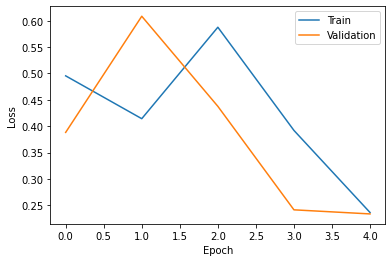

In [ ]:
# Plot the training loss
plt.plot(results.history["loss"], label = "Train")

# Plot the validation loss
plt.plot(results.history["val_loss"], label = "Validation")

# Name the x and y axises
plt.xlabel("Epoch")
plt.ylabel("Loss")

# Put legend table
plt.legend()

# Show the plot
plt.show()


Now, do the same thing for accuracy.

* Accuracy scores can be found in:

* results.history["accuracy"]

* results.history["val_accuracy"]

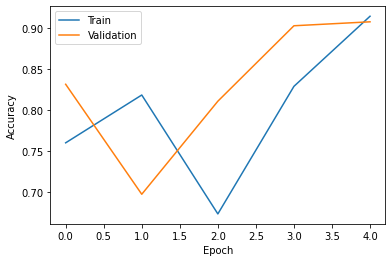

In [ ]:
# Plot the training accuracy
plt.plot(results.history["accuracy"], label = "Train")

# Plot the validation accuracy
plt.plot(results.history["val_accuracy"], label = "Validation")

# Name the x and y axises
plt.xlabel("Epoch")
plt.ylabel("Accuracy")

# Put legend table
plt.legend()

# Show the plot
plt.show()


### Performance Evaluation

Let's use the test dataset we created to evaluate the performance of the model.

* Use test_on_batch() method with test dataset as parameter.

In [ ]:
# Evaluate the performance
model.evaluate(X_test, y_test)

157/157 [==============================] - 4s 26ms/step - loss: 0.2292 - accuracy: 0.9040


[0.22921982407569885, 0.9039999842643738]

### Try a Prediction

Next, we take a sample and make a prediction on it.

* Reshape the review to (1, 1024).

* Use the .prediction() method of the model object.

In [ ]:
# Make prediction on the reshaped sample
prediction_result = model.predict(X_test[789].reshape(1, 1024))

In [ ]:
print(f"Label: {y_test[789]} | Prediction: {prediction_result}")

Label: 0 | Prediction: [[0.05775834]]


### AI9081 Wrap Up

Hello and welcome back! Congrats, we have come to the end of our course. Before we say goodbye, let’s quickly cover what we have learned so far, shall we? First, we introduced the structure of neural networks, how they are built of perceptrons, and their components: the input, hidden and output layers. And how the depth of one of these components, hidden layers, gave deep learning its name. After understanding its structure, we saw how information is transferred through a neural network model with forward propagation. Then we checked out how to improve an ANN model with training by changing its learnable parameters between each layer, so called weights and biases. We dove deeper into learnable parameter and hyperparameter terms. We learned about gradients and discovered how backpropagation is used to compute the gradients, in order to train a neural network model.

 

In the second chapter, we talked about how machines perceive everything as numbers. So, it was time to understand how machines find their way between all the numbers. We learned what convolution is and how it is performed. We also introduced different types of convolutional kernels and how they extract features which deliver the needed spatial information. We discussed that while there are some ready to use predefined kernels, designed by incredible engineers, the kernel values can also be defined by the model. We looked at how feature extraction can happen without manually set filters. And with this knowledge in mind, we introduced the structure of one of the most crucial methods of deep learning: Convolutional Neural Networks.

 

The last type of neural networks we introduced were Recurrent Neural Networks. We started with why we want to use temporal information in our models and explained how RNNs can do this for us. We learned how the hidden state represents information from previous time steps, different architectures of RNNs and their applications. We talked about the limitations of RNNs and of course how we can overcome them. The problem of exploding and vanishing gradients we may run into and how gradient clipping techniques, GRU and LSTM can help us solve these problems. And through all the way, we can proudly say that we also gained some pretty good hands-on experience with the projects we completed together.

 

Remember, this is not the end, but only the beginning of your deep learning journey. Be ready to always discover more.